In [1]:
import import_ipynb
import josh_data_preprocessing
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, confusion_matrix, roc_curve, auc
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

- remove seasonablity
- drop nans (if pre-processing from seasonality)
- others?
- try to understand autocorrelation in initial features
- 

- get residuals for each timestep
- cluster the residuals
- adaptive thresholding (exponential moving average could be good)
- use windowing to be more robust to what average values should be. 
- feature engineering -> add month, add important interaction terms, 

- rule based detection (set threshold based on training data)
- require multiple anomalies in a row to happen in order to flag is an anomaly. 

In [2]:
# # training data
# u4_train_equil_turbine = data_preprocessing.u4_train_equil_turbine
# u4_train_equil_pump = data_preprocessing.u4_train_equil_pump
# u5_train_equil_turbine = data_preprocessing.u5_train_equil_turbine
# u5_train_equil_pump = data_preprocessing.u5_train_equil_pump
# u6_train_equil_turbine = data_preprocessing.u6_train_equil_turbine
# u6_train_equil_pump = data_preprocessing.u6_train_equil_pump

# # synethetic test sets
# u5_s01_equil_turbine = data_preprocessing.u5_s01_equil_turbine
# u5_s01_equil_pump = data_preprocessing.u5_s01_equil_pump
# u5_s02_equil_turbine = data_preprocessing.u5_s02_equil_turbine
# u5_s02_equil_pump = data_preprocessing.u5_s02_equil_pump
# u6_s01_equil_turbine = data_preprocessing.u6_s01_equil_turbine
# u6_s01_equil_pump = data_preprocessing.u6_s01_equil_pump
# u6_s02_equil_turbine = data_preprocessing.u6_s02_equil_turbine
# u6_s02_equil_pump = data_preprocessing.u6_s02_equil_pump

# # real test sets
# u4_test_equil_turbine = data_preprocessing.u4_test_equil_turbine
# u4_test_equil_pump = data_preprocessing.u4_test_equil_pump
# u5_test_equil_turbine = data_preprocessing.u5_test_equil_turbine
# u5_test_equil_pump = data_preprocessing.u5_test_equil_pump
# u6_test_equil_turbine = data_preprocessing.u6_test_equil_turbine
# u6_test_equil_pump = data_preprocessing.u6_test_equil_pump

In [3]:
# training data
u4_train_equil_turbine = josh_data_preprocessing.u4_train_equil_turbine
u4_train_equil_pump = josh_data_preprocessing.u4_train_equil_pump
u5_train_equil_turbine = josh_data_preprocessing.u5_train_equil_turbine
u5_train_equil_pump = josh_data_preprocessing.u5_train_equil_pump
u6_train_equil_turbine = josh_data_preprocessing.u6_train_equil_turbine
u6_train_equil_pump = josh_data_preprocessing.u6_train_equil_pump

# synethetic test sets
u5_s01_equil_turbine = josh_data_preprocessing.u5_s01_equil_turbine
u5_s01_equil_pump = josh_data_preprocessing.u5_s01_equil_pump
u5_s02_equil_turbine = josh_data_preprocessing.u5_s02_equil_turbine
u5_s02_equil_pump = josh_data_preprocessing.u5_s02_equil_pump
u6_s01_equil_turbine = josh_data_preprocessing.u6_s01_equil_turbine
u6_s01_equil_pump = josh_data_preprocessing.u6_s01_equil_pump
u6_s02_equil_turbine = josh_data_preprocessing.u6_s02_equil_turbine
u6_s02_equil_pump = josh_data_preprocessing.u6_s02_equil_pump

# real test sets
u4_test_equil_turbine = josh_data_preprocessing.u4_test_equil_turbine
u4_test_equil_pump = josh_data_preprocessing.u4_test_equil_pump
u5_test_equil_turbine = josh_data_preprocessing.u5_test_equil_turbine
u5_test_equil_pump = josh_data_preprocessing.u5_test_equil_pump
u6_test_equil_turbine = josh_data_preprocessing.u6_test_equil_turbine
u6_test_equil_pump = josh_data_preprocessing.u6_test_equil_pump

In [ ]:
# restart kernel/VScode until the ema features show up

u5_s01_equil_pump

,tot_activepower,ext_tmp,plant_tmp,charge,coupler_position,injector_01_opening,injector_02_opening,injector_03_opening,injector_04_opening,injector_05_opening,...,anomaly_01_type_c,anomaly,minute,hour,day,month,year,dayofweek,dayofyear,is_weekend
2021-06-02 03:01:00+02:00,-118.436539,15.627834,16.685634,-1.465630,185.125446,0.0,0.0,0.0,0.0,0.0,...,NaN,0,1,3,2,6,2021,2,153,0
2021-06-02 03:01:30+02:00,-118.369727,15.621683,16.693007,-1.395340,185.121137,0.0,0.0,0.0,0.0,0.0,...,NaN,0,1,3,2,6,2021,2,153,0
2021-06-02 03:02:00+02:00,-118.415108,15.615531,16.700380,-1.458481,185.116828,0.0,0.0,0.0,0.0,0.0,...,NaN,0,2,3,2,6,2021,2,153,0
2021-06-02 03:02:30+02:00,-118.791370,15.609380,16.707753,-1.391400,185.112519,0.0,0.0,0.0,0.0,0.0,...,NaN,0,2,3,2,6,2021,2,153,0
2021-06-02 03:03:00+02:00,-118.936339,15.603229,16.715125,-1.657380,185.108211,0.0,0.0,0.0,0.0,0.0,...,NaN,0,3,3,2,6,2021,2,153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-30 18:54:30+02:00,-118.792975,30.631618,19.815266,-1.703233,185.502206,0.0,0.0,0.0,0.0,0.0,...,NaN,0,54,18,30,7,2021,4,211,0
2021-07-30 18:55:00+02:00,-119.122639,30.663936,19.828866,-1.620671,185.553210,0.0,0.0,0.0,0.0,0.0,...,NaN,0,55,18,30,7,2021,4,211,0
2021-07-30 18:55:30+02:00,-119.633850,30.696253,19.885619,-1.380714,185.604214,0.0,0.0,0.0,0.0,0.0,...,NaN,0,55,18,30,7,2021,4,211,0
2021-07-30 18:56:00+02:00,-119.188614,30.728571,19.942371,-1.395340,185.655219,0.0,0.0,0.0,0.0,0.0,...,NaN,0,56,18,30,7,2021,4,211,0


In [ ]:
# need to add _ema_10 to all the features!

features = [
    'tot_activepower', 'charge', 'coupler_position', 'injector_01_opening', 'injector_02_opening',
    'injector_03_opening', 'injector_04_opening', 'injector_05_opening', 'pump_calculated_flow',
    'pump_pressure_diff', 'pump_rotspeed', 'turbine_pressure', 'turbine_rotspeed',
    'water_primary_pump_01_opening', 'water_primary_pump_02_opening', 'timer_turbine_on_off', 
    'minute', 'hour', 'day', 'month', 'year', 'dayofweek','dayofyear', 'is_weekend'
]

In [6]:
# Check if 'timer_turbine_on_off' is present; if not, exclude it from the feature list
features = [feature for feature in features if feature in u5_train_equil_pump.columns]

target = 'stat_magn_01_tmp'

# Split the data into training and testing sets
X = u5_train_equil_pump[features]
y = u5_train_equil_pump[target]

In [7]:
# # Standardize the features before applying PCA
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Applying PCA
# pca = PCA(n_components=0.95)  # Keep 95% of variance
# X_pca = pca.fit_transform(X_scaled)

# print(f"Reduced number of features from {X.shape[1]} to {X_pca.shape[1]}")

In [8]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Random Forest model
model = RandomForestRegressor(n_estimators=30, random_state=42)
# model.fit(X_train, y_train)
model.fit(X, y)

# Predict on the test set
y_pred = model.predict(X)

residuals = y - y_pred

# Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r_squared = r2_score(y_test, y_pred)


# print(f'Mean Squared Error: {mse}')
# print(f'Root Mean Squared Error: {rmse}')
# print(f"R squared : {r_squared}")

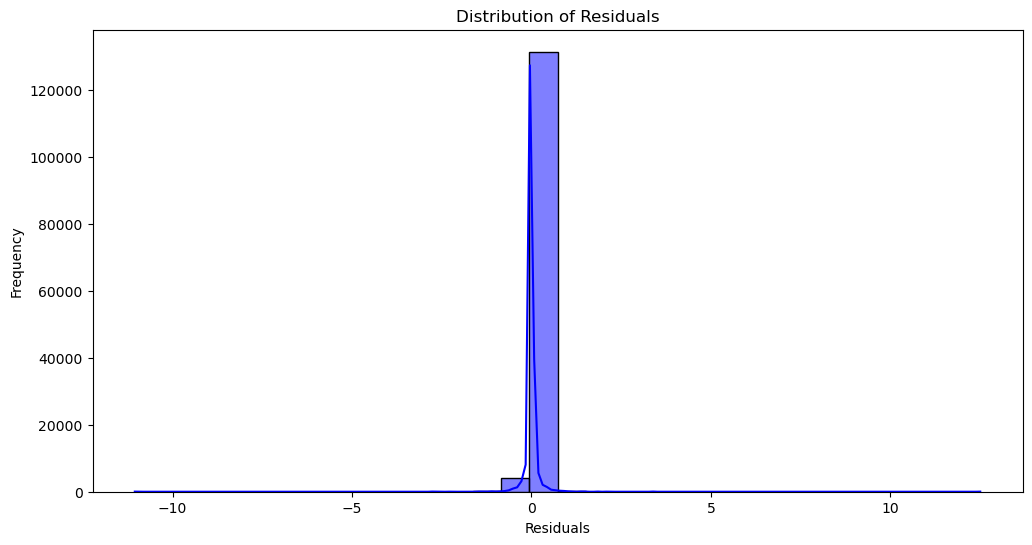

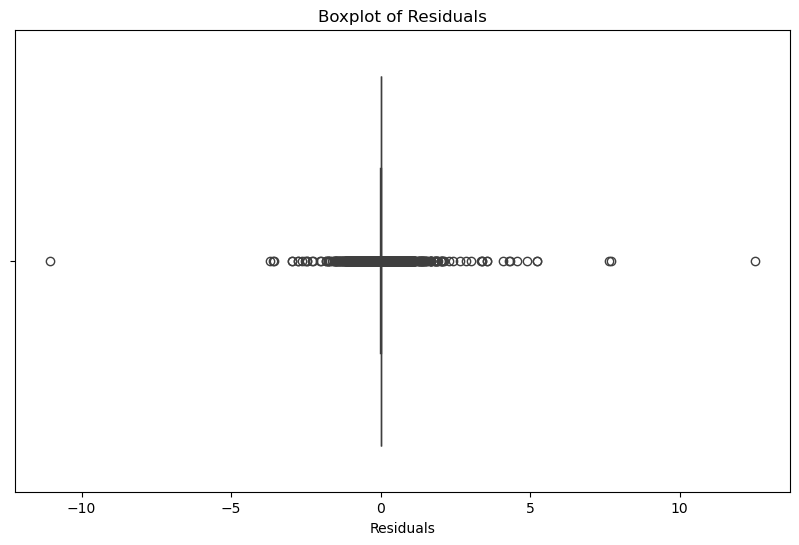

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Optionally, also plot a boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=residuals)
plt.title('Boxplot of Residuals')
plt.xlabel('Residuals')
plt.show()

In [10]:
# Basic statistical measures
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)
max_residual = np.max(residuals)
min_residual = np.min(residuals)

print(f"Mean of Residuals: {mean_residual}")
print(f"Standard Deviation of Residuals: {std_residual}")
print(f"Max Residual: {max_residual}")
print(f"Min Residual: {min_residual}")


# Example threshold at 3 standard deviations from the mean
threshold = mean_residual + 4 * std_residual
print(f"Anomaly Threshold: {threshold}")

Mean of Residuals: 0.0009442138630871226
Standard Deviation of Residuals: 0.10354276523619867
Max Residual: 12.504519966875115
Min Residual: -11.050847747965761
Anomaly Threshold: 0.4151152748078818


In [11]:
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_pred, alpha=0.5)
# plt.title('Actual vs Predicted Values')
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
# plt.show()

# # Plot the actual and predicted values over the test set
# plt.figure(figsize=(14, 7))
# plt.scatter(y_test.index, y_test)
# plt.scatter(y_test.index, y_pred)
# # plt.plot(y_test.index, y_test, label='Actual Values', color='blue', marker='o')
# # plt.plot(y_test.index, y_pred, label='Predicted Values', color='red', linestyle='--', marker='x')
# plt.title('Comparison of Actual and Predicted Values')
# plt.xlabel('Index')
# plt.ylabel('Stator Coil Temperature')
# plt.legend()
# plt.show()

In [12]:
# Extracting the features and target from the synthetic test set
X_synthetic = u5_s01_equil_pump[features]

y_synthetic = u5_s01_equil_pump['stat_magn_01_tmp']

# Predict using the trained model
y_pred_synthetic = model.predict(X_synthetic)

In [13]:
# Evaluate the model performance on synthetic data
mse_synthetic = mean_squared_error(y_synthetic, y_pred_synthetic)
rmse_synthetic = np.sqrt(mse_synthetic)
r_squared_synthetic = r2_score(y_synthetic, y_pred_synthetic)

print(f'Mean Squared Error on Synthetic Data: {mse_synthetic}')
print(f'Root Mean Squared Error on Synthetic Data: {rmse_synthetic}')
print(f"R squared : {r_squared_synthetic}")

Mean Squared Error on Synthetic Data: 34.319655794096576
Root Mean Squared Error on Synthetic Data: 5.858298028787591
R squared : 0.5712584091180335


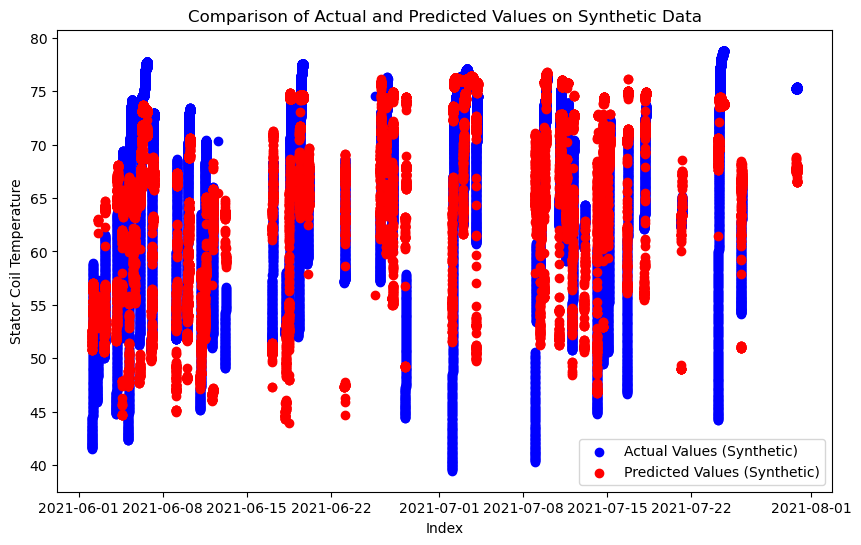

In [14]:
# Visualizing the results with a scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_synthetic.index, y_synthetic, label='Actual Values (Synthetic)', color='blue')
plt.scatter(y_synthetic.index, y_pred_synthetic, label='Predicted Values (Synthetic)', color='red')
plt.title('Comparison of Actual and Predicted Values on Synthetic Data')
plt.xlabel('Index')
plt.ylabel('Stator Coil Temperature')
plt.legend()
plt.show()

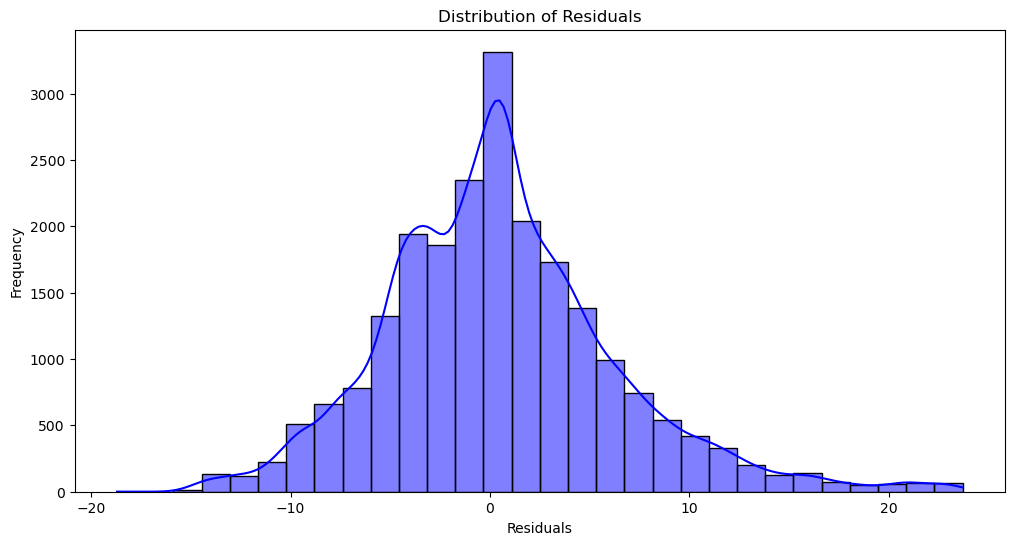

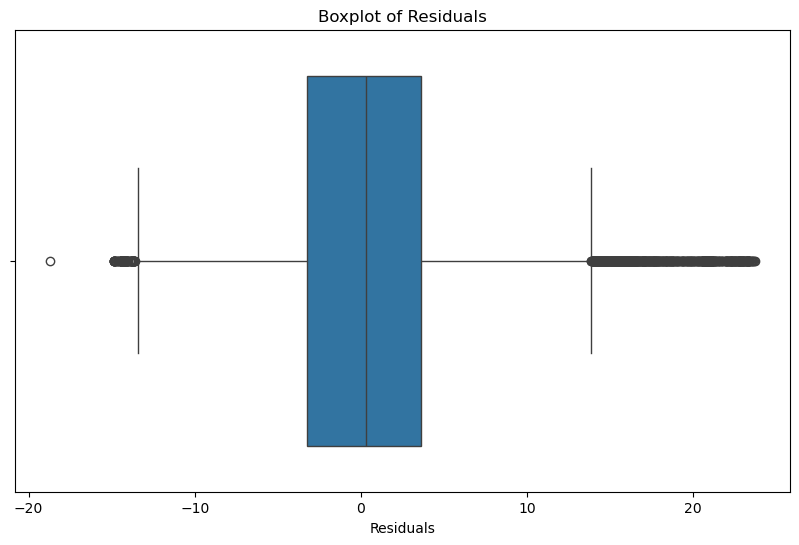

In [15]:
residuals_synthetic = y_pred_synthetic - y_synthetic

plt.figure(figsize=(12, 6))
sns.histplot(residuals_synthetic, kde=True, color='blue', bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Optionally, also plot a boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=residuals_synthetic)
plt.title('Boxplot of Residuals')
plt.xlabel('Residuals')
plt.show()

In [16]:
u5_s01_equil_pump['anomaly']

2021-06-02 03:01:00+02:00    0
2021-06-02 03:01:30+02:00    0
2021-06-02 03:02:00+02:00    0
2021-06-02 03:02:30+02:00    0
2021-06-02 03:03:00+02:00    0
                            ..
2021-07-30 18:54:30+02:00    0
2021-07-30 18:55:00+02:00    0
2021-07-30 18:55:30+02:00    0
2021-07-30 18:56:00+02:00    0
2021-07-30 18:56:30+02:00    0
Name: anomaly, Length: 22199, dtype: int64

In [17]:
# Step 3: Classify based on threshold
residuals_abs = np.abs(residuals_synthetic)

predicted_anomalies = (abs(residuals_synthetic) > threshold).astype(int)

# Step 4: Evaluate the model
true_anomalies = u5_s01_equil_pump['anomaly']

accuracy = accuracy_score(true_anomalies, predicted_anomalies)
f1 = f1_score(true_anomalies, predicted_anomalies)
conf_matrix = confusion_matrix(true_anomalies, predicted_anomalies)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8391368980584711
F1 Score: 0.9120811482876628
Confusion Matrix:
[[  105  2015]
 [ 1556 18523]]


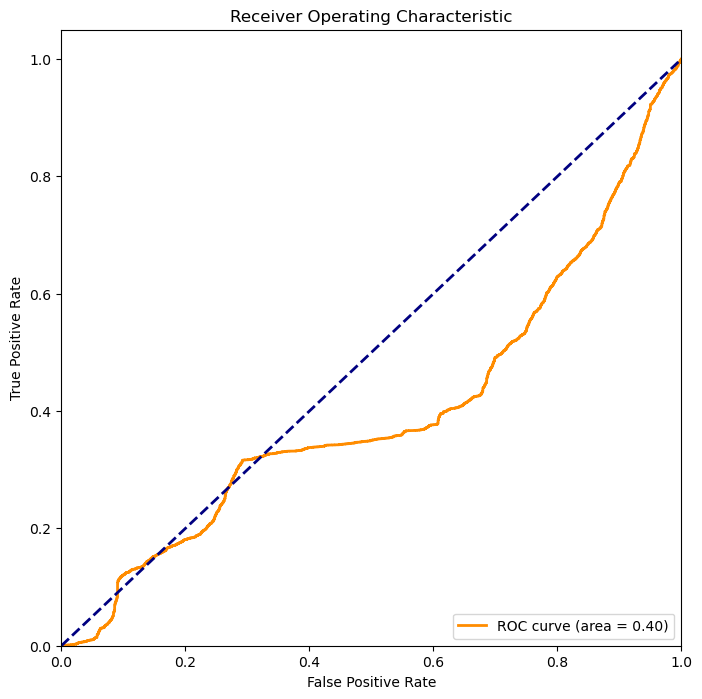

In [18]:
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(true_anomalies, residuals_abs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()